In [12]:
import numpy as np
import pandas as pd

In [13]:
df1 = pd.read_csv('Fake.csv')
df2 = pd.read_csv('True.csv')

In [14]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23454 entries, 0 to 23453
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23454 non-null  object
 1   text     23454 non-null  object
 2   subject  23454 non-null  object
 3   date     23444 non-null  object
dtypes: object(4)
memory usage: 733.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [15]:
print("Fake : \n",df1.isnull().sum())
print("\nTrue : \n",df1.isnull().sum())

Fake : 
 title       0
text        0
subject     0
date       10
dtype: int64

True : 
 title       0
text        0
subject     0
date       10
dtype: int64


In [16]:
df1['Label']=0
df2['Label']=1

In [17]:
data = pd.concat([df1, df2], ignore_index=True)

In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44871 entries, 0 to 44870
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44871 non-null  object
 1   text     44871 non-null  object
 2   subject  44871 non-null  object
 3   date     44861 non-null  object
 4   Label    44871 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [47]:
data["content"] = data["title"].fillna("") + " " + data["text"].fillna("")
data = data[["content", "Label"]].dropna()

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44871 entries, 0 to 44870
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  44871 non-null  object
 1   Label    44871 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.2+ KB


In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X = data.content
y = data.Label

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data["content"], data["Label"], test_size=0.2, random_state=42)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [63]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)  
X_test_tfidf = vectorizer.transform(X_test)

In [64]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [65]:
y_pred = model.predict(X_test_tfidf)

In [66]:
from sklearn import metrics
print("Accuracy Score: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score:  0.9911977715877437


In [67]:
from sklearn import metrics
print("Confusion Matrix: ")
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

Confusion Matrix: 
[[4686   46]
 [  33 4210]]


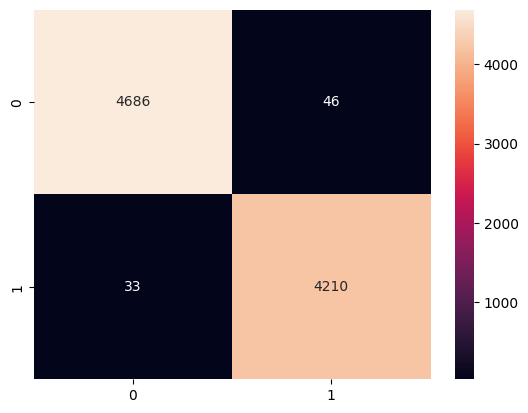

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [71]:
from sklearn import metrics
print("Classification Report: ")
cr = metrics.classification_report(y_test,y_pred)
print(cr)

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4732
           1       0.99      0.99      0.99      4243

    accuracy                           0.99      8975
   macro avg       0.99      0.99      0.99      8975
weighted avg       0.99      0.99      0.99      8975



In [72]:
import joblib
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
